In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import os
from pathos.multiprocessing import ProcessPool, ThreadPool
from glob import glob
from joblib import load, dump

In [2]:
low_stack   = load('./low_cropped_images.pkl')
low_classes = load('./low_classes.np')
high_stack  = load('./high_cropped_images.pkl')

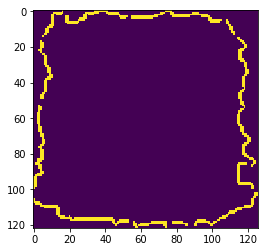

In [5]:
import time
f = np.random.rand()
e = 0.1459
f = .2459
plt.imshow(low_stack[int(len(low_stack)*e)])

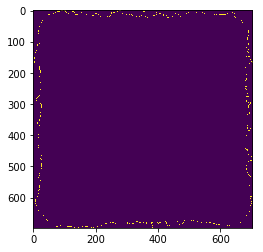

In [6]:
plt.imshow(high_stack[int(len(high_stack)*f)])

In [113]:
mardas = [low_stack[i] for i in range(len(low_stack)) if low_classes[i] == 0]

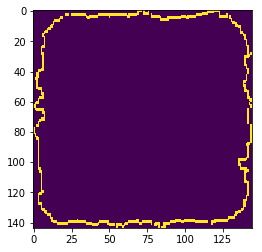

In [114]:
e = .5
img1 = low_stack[int(len(low_stack)*e)]
plt.imshow(img1)

In [115]:
def fun(img1):
    img1 = cv2.dilate(img1, np.ones((3,3)))
    S = []
    for i in range(4):
        img1 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE) if i else img1
        for img2 in high_stack:
            img2 = cv2.dilate(img2, np.ones((3,3)))
            img2 = (cv2.resize(img2*255, img1.shape[::-1])>0).astype('uint8')
            img2 = cv2.dilate(img2, np.ones((3,3)))
            S.append(np.sum(img1 ^ img2))
    return np.argmin(np.array(S).reshape(-1, 4), axis=0)

In [116]:
with ProcessPool(5) as p:
    S = np.array(p.map(fun, low_stack))

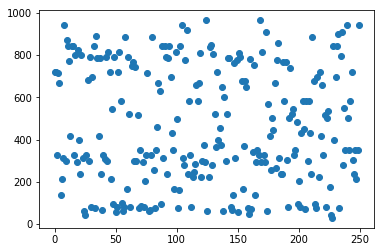

In [122]:
plt.scatter(range(len(S)), S[:,0])

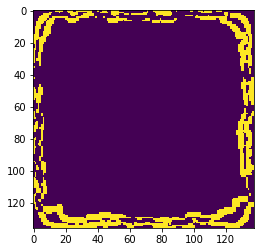

In [123]:
img1 = low_stack[np.random.randint(len(low_stack))]
img1 = cv2.dilate(img1, np.ones((3,3)))
plt.imshow(img1)
img2 = high_stack[np.random.randint(len(high_stack))]
img2 = cv2.dilate(img2, np.ones((3,3)))
img2 = (cv2.resize(img2*255, img1.shape[::-1])>0).astype('uint8')
img2 = cv2.dilate(img2, np.ones((3,3)))
plt.imshow(img2 ^ img1)

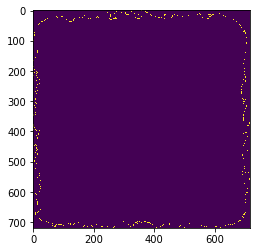

In [36]:
plt.imshow(high_stack[100])

In [ ]:
1000 * 2.9